# METHANOGENIC BIODEGRADATION OF PHENOL
http://hydrochemistry.eu/exmpls/phenol.html

In [4]:
%pylab inline
import phreeqpython
from scipy.integrate import odeint
pp = phreeqpython.PhreeqPython('phreeqc.dat')

Populating the interactive namespace from numpy and matplotlib


In [5]:
pp.add_master_species(element="Phenol", master_species="Phenol", alkalinity=0, gfw=1, egfw=1)
pp.add_species("Phenol = Phenol", 0)

## Phreeqc Calculation

### Monod Kinetics

The following function describes the monod kinetics

In [93]:
def rate_phenol(phenol, _, sol, k_max, k_half):
    S = phenol[0] * 1e-3 # convert to g/l
    if S < 1e-9:
        return 0
    rate = -k_max * S / (k_half + S)
    return rate * 1e3

### Dissolution Calculation

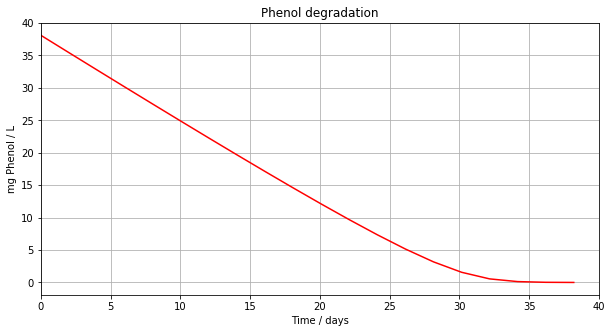

In [94]:
solution1 = pp.add_solution({'Phenol': 38.1})

t = np.linspace(0, 3.3e6, 20)

# solve differential equation
y = odeint(rate_phenol,38.1,t, args=(solution1, 1.61e-8, 1.7e-3))

plt.figure(figsize=[10,5])
plt.xlabel('Time / days')
plt.ylabel('mg Phenol / L')
plt.title('Phenol degradation')
plt.plot(t/86400, y, 'r-')
plt.xlim(0,40)
plt.grid()